In [66]:
import pytz
from datetime import datetime, timedelta

import pandas as pd


DATE_FORMAT = '%a, %m/%d/%Y'
TIME_FORMAT = '%I:%M %p'
PACIFIC_TIME = pytz.timezone('US/Pacific')
TIME_ZERO = datetime(1900, 1, 1)

with open('[LINE] Chat in Epic Chat Chain.txt', 'r') as f:
    raw_text = f.read()
    
days = raw_text.split('\n\n')

columns = ['timestamp', 'name', 'text']
records = pd.DataFrame()

# days[0] is header

for day in days[1:]:
    lines = day.split('\n')
    first_value_line = 1
    
    try:
        date = datetime.strptime(lines[0], DATE_FORMAT)
    except ValueError:
        # '\n\n' was in text, carry on same day
        first_value_line = 0
    
    for line_int, line in enumerate(lines[first_value_line:]):
    
        try:
            time, name, text = tuple(line.split('\t'))
        except ValueError:
            # if '\n' in text, next line should append to previous
            records.loc[records.index.max(), 'text'] = records.loc[records.index.max(), 'text'] + ' ' + line

            # trying to add milliseconds in case the new line comes in after a double line... 
            # line_int + records.loc[records.index.max(), 'timestamp'].microsecond / 1000

        # adding line_int milliseconds to separate same-minute stamped records
        delta = datetime.strptime(time, TIME_FORMAT) - TIME_ZERO + timedelta(milliseconds=line_int)
        timestamp = PACIFIC_TIME.localize(date + delta)
        new_df = pd.DataFrame(dict(zip(columns, [timestamp, name, text])), index=[0])

        records = pd.concat([records, new_df], ignore_index=True)
    
records = records.set_index('timestamp')
print(records.iloc[:5])


                                            name  \
timestamp                                          
2017-02-19 19:18:00-08:00             Samir Awan   
2017-02-19 19:25:00.001000-08:00            Théo   
2017-02-19 19:25:00.002000-08:00            Théo   
2017-02-19 20:32:00.003000-08:00  Peter Linnartz   
2017-02-19 20:32:00.004000-08:00  Peter Linnartz   

                                                                               text  
timestamp                                                                            
2017-02-19 19:18:00-08:00         So happy she brought this to light. Insane the...  
2017-02-19 19:25:00.001000-08:00                                          [Sticker]  
2017-02-19 19:25:00.002000-08:00                     What's wrong with some people   
2017-02-19 20:32:00.003000-08:00  We're all safe but this dude just nailed us co...  
2017-02-19 20:32:00.004000-08:00  Super slippery, more cars than I've ever seen ...  


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


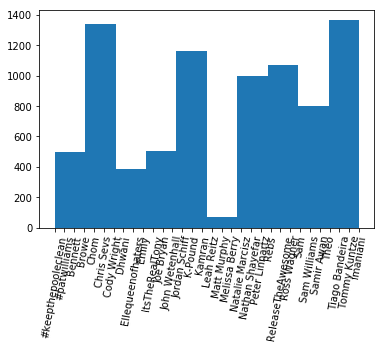

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(records['name'])
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

fig.show()
fig.canvas.draw()
